In [1]:
%load_ext lab_black

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    Lasso,
    Ridge,
)

In [3]:
DATA_DIR = os.path.join("..", "data")
TRAIN_CSV_PATH = os.path.join(DATA_DIR, "train.csv")
TEST_CSV_PATH = os.path.join(DATA_DIR, "test.csv")
TARGET = "progression"

In [4]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
X_train = train_df.drop(TARGET, axis=1).values
y_train = train_df[TARGET].values

In [5]:
lasso_coefs = []
ridge_coefs = []
alphas = np.linspace(0, 50, 3000)
for alpha in alphas:

    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    lasso_coefs.append(lasso[-1].coef_)
    ridge_coefs.append(ridge[-1].coef_)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506298.4721142237, tolerance: 214.49684985835697
  positive)


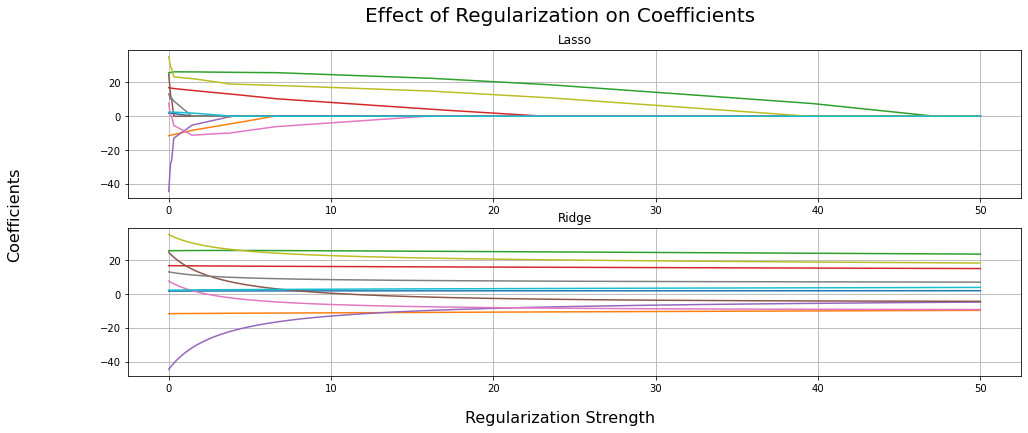

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))

lasso_ax = axes[0]
ridge_ax = axes[1]

lasso_ax.plot(alphas, lasso_coefs)
lasso_ax.set_title("Lasso")
lasso_ax.grid()

ridge_ax.plot(alphas, ridge_coefs)
ridge_ax.set_title("Ridge")
ridge_ax.grid()

fig.suptitle("Effect of Regularization on Coefficients", size=20)
fig.supxlabel("Regularization Strength", size=16)
fig.supylabel("Coefficients", size=16)

plt.show()